In [25]:
# 导入库 如果没有下载这些库，需要进行下载，下载方式自行百度

# DS数模团队原创思路，如果您买的是盗版，请务必在公众号：DS数模，输入：美赛。获取C题答疑群群号，本代码是不完全
# 代码，之后还会进行更新，另外如果本代码出现问题或其他优化思路，也会在答疑群进行更新！

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.stattools as st
from statsmodels.tsa.arima_model import ARIMA

D:\software\miniconda\envs\Mymind\lib\site-packages\numpy\__init__.py:148: UserWarning: mkl-service package failed to import, therefore Intel(R) MKL initialization ensuring its correct out-of-the box operation under condition when Gnu OpenMP had already been loaded by Python process is not assured. Please install mkl-service package, see http://github.com/IntelPython/mkl-service
  from . import _distributor_init


ImportError: Unable to import required dependencies:
numpy: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.7 from "D:\software\miniconda\envs\Mymind\python.exe"
  * The NumPy version is: "1.21.5"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: DLL load failed: 找不到指定的模块。


In [3]:
matplotlib.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False 
# 解决绘图中中文乱码

读取数据

In [4]:
bt_df = pd.read_csv('org_data/BCHAIN-MKPRU.csv')
gold_df = pd.read_csv('org_data/LBMA-GOLD.csv')

In [5]:
bt_df.head()

,Date,Value
0,9/11/16,621.65
1,9/12/16,609.67
2,9/13/16,610.92
3,9/14/16,608.82
4,9/15/16,610.38


In [6]:
gold_df.head()

,Date,USD (PM)
0,9/12/16,1324.60
1,9/13/16,1323.65
2,9/14/16,1321.75
3,9/15/16,1310.80
4,9/16/16,1308.35


将时间转换为日期数据类型的数据

In [7]:
gold_df['Date']=gold_df['Date'].apply(lambda x:datetime.datetime.strptime(x,'%m/%d/%y'))
bt_df['Date']=bt_df['Date'].apply(lambda x:datetime.datetime.strptime(x,'%m/%d/%y'))
gold_df.head()
gold_df.to_excel('黄金时间转日期.xlsx')
bt_df.to_excel('比特币时间转日期.xlsx')

In [8]:
bt_df.head()

,Date,Value
0,2016-09-11,621.65
1,2016-09-12,609.67
2,2016-09-13,610.92
3,2016-09-14,608.82
4,2016-09-15,610.38


将两张表进行拼接  
黄金在非交易日的价格以上一个交易日的价格进行补充，并标记当前是否为黄金交易日  
DealDay为1表示是黄金交易日，0为不是黄金交易日

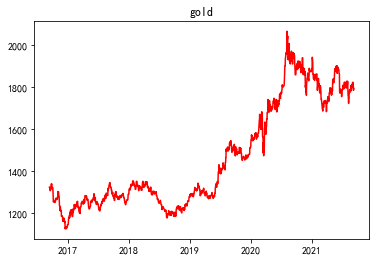

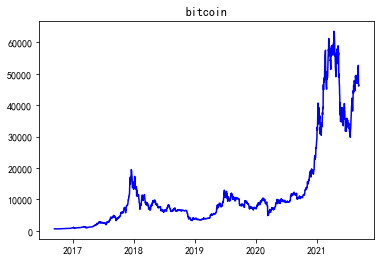

In [20]:
df = gold_df.merge(bt_df, on='Date',how='outer')
df=df.sort_values(by='Date')
df.index=[i for i in range(df.shape[0])]
df['DealDay']=df['USD (PM)'].apply(lambda x:int(not np.isnan(x)))
df=df.fillna(method='ffill')
df.to_excel('黄金-比特币-黄金交易日表.xlsx')
df.head()

plt.plot(df['Date'],df['USD (PM)'],color="red")
plt.title('gold')
plt.savefig('gold.png')
plt.show()
plt.plot(df['Date'],df['Value'],color="blue")
plt.title('bitcoin')
plt.savefig('bit.png')
plt.show()

计算黄金与比特币的每日涨幅（未区分是否为黄金交易日）

In [10]:
df['gold_increase']=0
df['bitcoin_increase']=0
for i in df.index[1:]:
    df['gold_increase'][i]=df['USD (PM)'][i]-df['USD (PM)'][i-1]
    df['bitcoin_increase'][i]=df['Value'][i]-df['Value'][i-1]

D:\software\miniconda\envs\Mymind\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
D:\software\miniconda\envs\Mymind\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
D:\software\miniconda\envs\Mymind\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

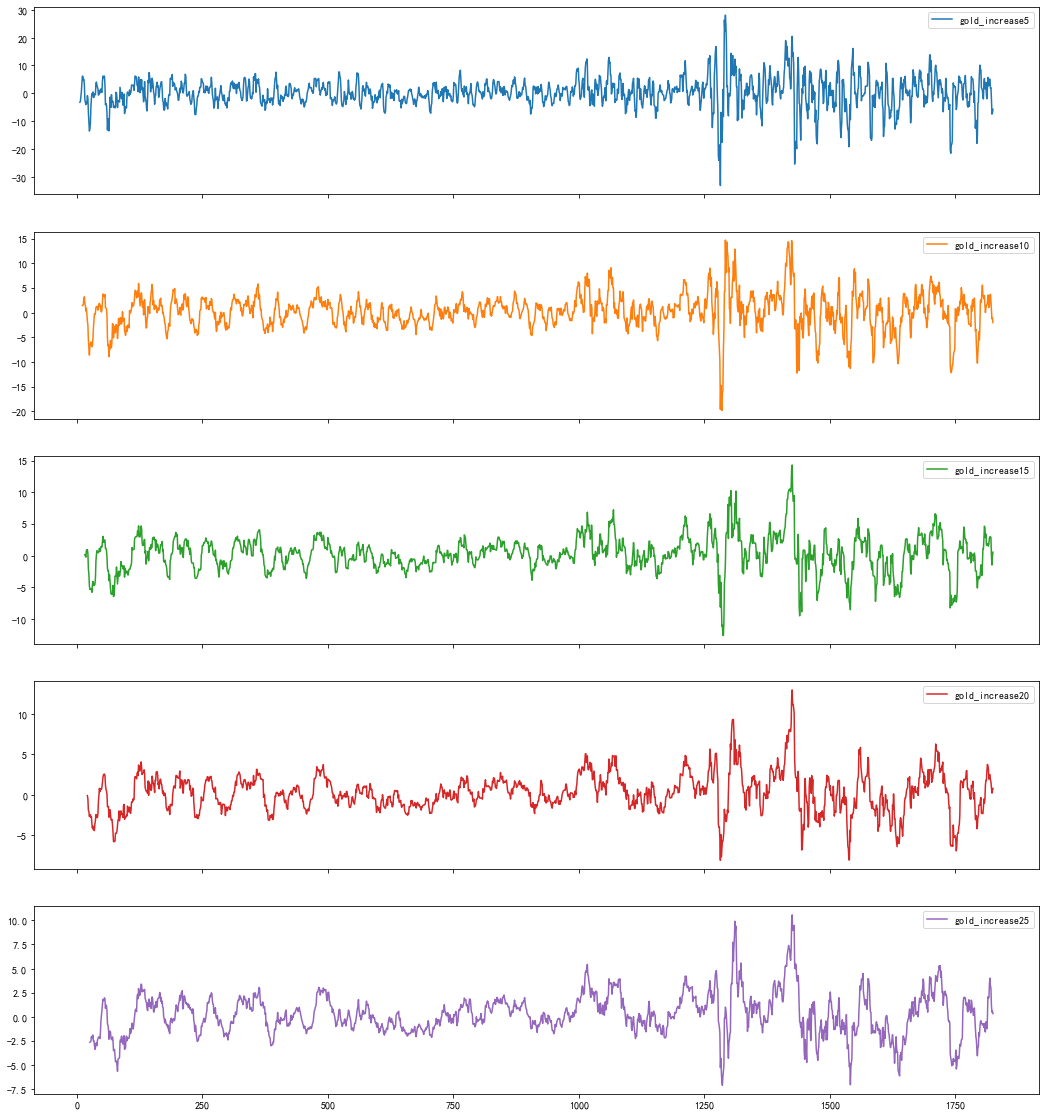

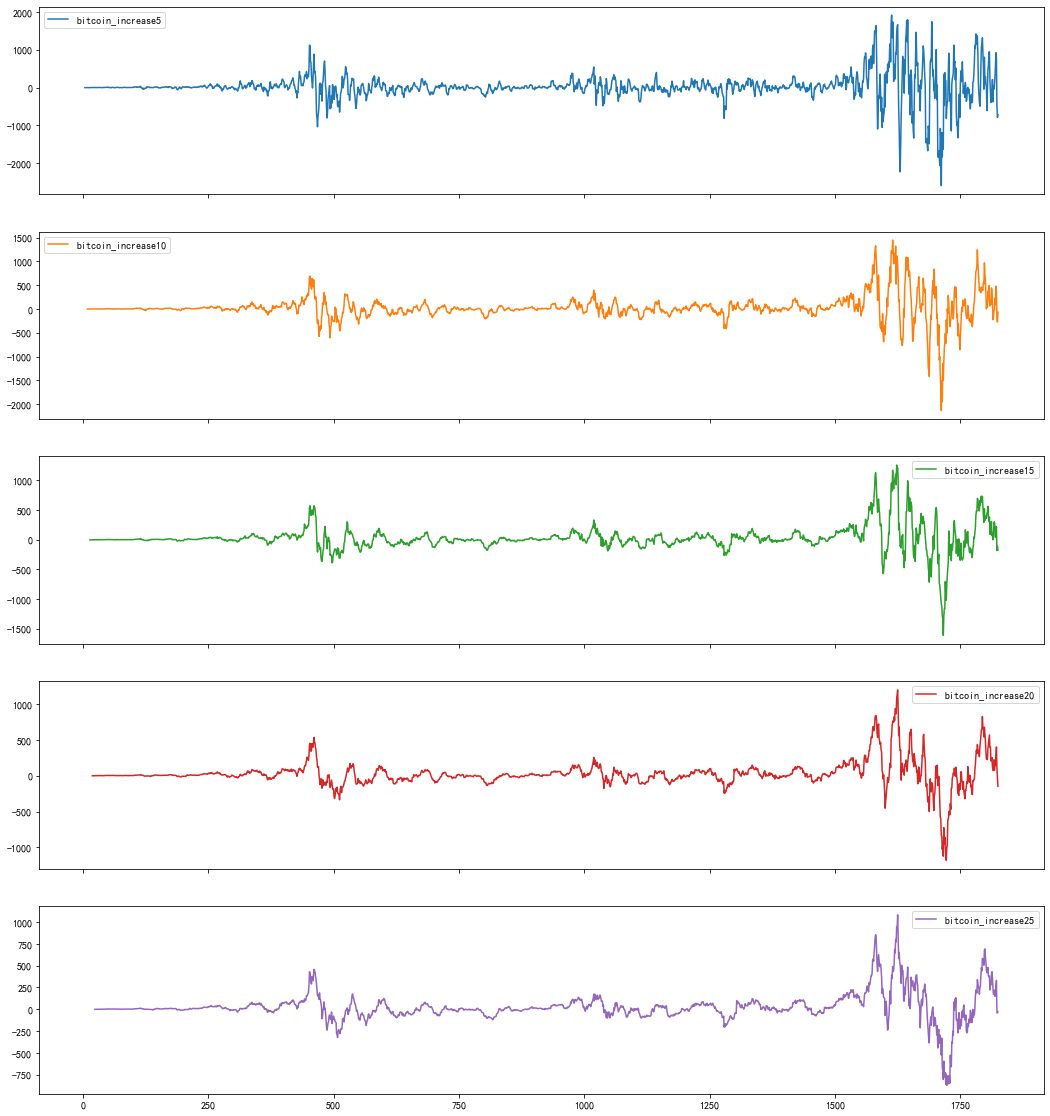

In [11]:
df_info = pd.DataFrame()
for i in range(5,26,5):
    df_info['gold_increase'+str(i)]=df['gold_increase'].rolling(i).mean()
    df_info['bitcoin_increase'+str(i)]=df['bitcoin_increase'].rolling(i).mean()
df_info[['gold_increase'+str(i) for i in range(5,26,5)]].plot(subplots=True, figsize=(18,20))
plt.savefig('gold_increase with time.png')
plt.show()
df_info[['bitcoin_increase'+str(i) for i in range(5,26,5)]].plot(subplots=True, figsize=(18,20))
plt.savefig('bitcoin_increase with time.png')
plt.show()

由上图得出比特币根据五天的涨幅计算均值,最大涨幅在2000,但是根据前十天的涨幅计算均值,最大涨幅就降至1000,容易错过剧烈变化,所以根据五天的涨幅评估    
n日操盘法
黄金涨幅较小,可以根据前15天的涨幅进行计算

n日乖离率=（当前价格-n日均价）/n日均价

In [11]:
df['黄金15日均价']=df['USD (PM)'].rolling(15).mean()
df['黄金15日乖离率']=100*(df['USD (PM)']-df['黄金15日均价'])/df['黄金15日均价']
df['比特币5日均价']=df['Value'].rolling(5).mean()
df['比特币5日乖离率']=100*(df['Value']-df['比特币5日均价'])/df['比特币5日均价']

In [12]:
df.to_excel('乖离率-均价表.xlsx')

In [12]:
# 先初始化，后续进行计算
df['Proportion of current gold investment']=0
df['Proportion of current bitcoin investment']=0
df['黄金投资风险']=0
df['比特币投资风险']=0
df['黄金持有份额']=0
df['比特币持有份额']=0
df['现金持有份额']=0
df['总资产']=0
df['总资产变化率']=0

In [13]:
df.head(20)

,Date,USD (PM),Value,DealDay,gold_increase,bitcoin_increase,Proportion of current gold investment,Proportion of current bitcoin investment,黄金投资风险,比特币投资风险,黄金持有份额,比特币持有份额,现金持有份额,总资产,总资产变化率
0,2016-09-11,NaN,621.65,0,0.00,0,0,0,0,0,0,0,0,0,0
1,2016-09-12,1324.60,609.67,1,NaN,-11,0,0,0,0,0,0,0,0,0
2,2016-09-13,1323.65,610.92,1,-0.95,1,0,0,0,0,0,0,0,0,0
3,2016-09-14,1321.75,608.82,1,-1.90,-2,0,0,0,0,0,0,0,0,0
4,2016-09-15,1310.80,610.38,1,-10.95,1,0,0,0,0,0,0,0,0,0
5,2016-09-16,1308.35,609.11,1,-2.45,-1,0,0,0,0,0,0,0,0,0
6,2016-09-17,1308.35,607.04,0,0.00,-2,0,0,0,0,0,0,0,0,0
7,2016-09-18,1308.35,611.58,0,0.00,4,0,0,0,0,0,0,0,0,0
8,2016-09-19,1314.85,610.19,1,6.50,-1,0,0,0,0,0,0,0,0,0
9,2016-09-20,1313.80,608.66,1,-1.05,-1,0,0,0,0,0,0,0,0,0


In [ ]:
# 初始化
df['当前黄金利润']=0
df['当前比特币利润']=0
df['牛市']=0
df['黄金15日后预计份额']=0
df['预计黄金涨幅']=0
df['比特币5日后预计份额']=0
df['预计比特币涨幅']=0
df['预计现金持有份额']=0
df['预计总资产']=0
df['预计总资产变化率']=0

In [ ]:
df.columns

In [ ]:
# def cal_(df,i):
#     '''
#     后续计算时使用
#     '''
#     df['总资产'][i]=df['黄金持有份额'][i]*df['USD (PM)'][i]+df['比特币持有份额'][i]*df['Value'][i]+df['现金持有份额'][i]
#     df['总资产变化率']=df['总资产'][i]-df['总资产'][i-1]
#     df['当前黄金投资占比'][i]=(df['黄金持有份额'][i]*df['USD (PM)'])/df['总资产'][i]
#     df['当前比特币投资占比'][i]=(df['比特币持有份额'][i]*df['Value'])/df['总资产'][i]
#     df['当前黄金利润'][i]=df['黄金持有份额'][i]*df['黄金涨幅'][i]+df['当前黄金利润'][i-1]
#     df['当前比特币利润'][i]=df['比特币持有份额'][i]*df['比特币涨幅'][i]+df['当前比特币利润'][i-1]
#     return df

In [ ]:
df.head()

对已经计算出的指标进行归一化    
归一化=（当前值-最小值）/（最大值-最小值）

In [ ]:
df=df.fillna(0)
for column in df.columns[3:10]:
    max_,min_=df[column].max(),df[column].min()
    while max_-min_!=0:
       
         df[column]=df[column].apply(lambda x:(x-min_)/(max_-min_))
       
   
df.to_excel('归一化.xlsx')
df.head()

# 黄金牛市
牛市评估指标=黄金涨幅的前90日均值x0.666+黄金15日乖离率的前90日均值x0.333  
(权重设置都较为主观，可以自己设置为不一样的，所有的权重都是类似的)  
大于牛市评估指标的均值为牛市，小于为熊市

In [ ]:
df['黄金牛市']=df['黄金涨幅'].rolling(90).mean()*0.666+0.333*df['黄金15日乖离率'].rolling(90).mean()
plt.scatter(df['Date'],df['黄金牛市'])
plt.savefig('黄金牛市指标图.png')
plt.show()

In [ ]:
gold_cow = []
gold_bear = []
for i in range(15,df.shape[0]):
    if df['黄金牛市'][i]>0.57 :
        gold_cow.append(i)
    if df['黄金牛市'][i]<=0.57:
        gold_bear.append(i)

In [ ]:
plt.plot(df['Date'][1:],df['USD (PM)'][1:])
plt.scatter(df['Date'][gold_cow].values,df['USD (PM)'][gold_cow],c='r',label='bear')
plt.scatter(df['Date'][gold_bear].values,df['USD (PM)'][gold_bear],c='g',label='bull')
plt.legend()
plt.savefig('黄金牛市分布图.png')
plt.show()

根据指标使用投票法确定牛熊市时间，如：根据指标得出今天为黄金牛市，则从一个季度前开始到今天都是牛市，但是昨天计算出为熊市，且明天也计算为熊市，则可能今天计算的结果的误差较大。为解决这种误差，所有时间初始值为0，当前计算出为牛市，则前一个季度的值加1，为熊市则减一。最后的结果大于0为牛市，小于0为熊市


In [ ]:
df['gold_cow']=0
for i in gold_cow:
    if i<90:
        continue
    for j in range(i-90,i):
        df['gold_cow'][j]+=1
for i in gold_bear:
    if i<90:
        continue
    for j in range(i-90,i):
        df['gold_cow'][j]-=1

In [ ]:
plt.plot(df['Date'][1:],df['USD (PM)'][1:])  # 数据的第一天不是黄金交易日，且没有数据可以补充，所以直接从第二天开始
plt.scatter(df['Date'][df['gold_cow']>0][1:],df['USD (PM)'][df['gold_cow']>0][1:],c='r',label='bull')
plt.scatter(df['Date'][df['gold_cow']<0][1:],df['USD (PM)'][df['gold_cow']<0][1:],c='g',label='bear')
plt.legend()
plt.savefig('黄金牛市最终分布图.png')
plt.show()

# 比特币牛市
比特币每一个月判断一次是否为牛市

In [ ]:
df['比特币牛市']=df['比特币涨幅'].rolling(30).mean()*0.666+0.333*df['比特币5日乖离率'].rolling(30).mean()
plt.scatter(df['Date'],df['比特币牛市'])
plt.savefig('比特币牛市指标图.png')
plt.show()
bt_cow = []
bt_bear = []
for i in range(15,df.shape[0]):
    if df['比特币牛市'][i]>0.52:
        bt_cow.append(i)
    if df['比特币牛市'][i]<=0.52:
        bt_bear.append(i)

In [ ]:
plt.plot(df['Date'][1:],df['Value'][1:])
plt.scatter(df['Date'][bt_cow].values,df['Value'][bt_cow],c='r',label='牛市')
plt.scatter(df['Date'][bt_bear].values,df['Value'][bt_bear],c='g',label='熊市')
plt.legend()
plt.savefig('比特币牛市分布图.png')
plt.show()

In [ ]:
df['bt_cow']=0
for i in bt_cow:
    if i<30:
        continue
    for j in range(i-30,i):
        df['bt_cow'][j]+=1
for i in bt_bear:
    if i<30:
        continue
    for j in range(i-30,i):
        df['bt_cow'][j]-=1

In [ ]:
plt.plot(df['Date'][1:],df['Value'][1:])
plt.scatter(df['Date'][df['bt_cow']>0],df['Value'][df['bt_cow']>0],c='r')
plt.scatter(df['Date'][df['bt_cow']<0],df['Value'][df['bt_cow']<0],c='g')
plt.savefig('比特币牛市最终分布图.png')
plt.show()

对牛市评分进行归一化

In [ ]:
max_,min_=df['gold_cow'].max(),df['gold_cow'].min()
df['黄金牛市']=df['gold_cow'].apply(lambda x:(x-min_)/(max_-min_))
max_,min_=df['bt_cow'].max(),df['bt_cow'].min()
df['比特币牛市']=df['bt_cow'].apply(lambda x:(x-min_)/(max_-min_))

# 风险
黄金购买风险=黄金乖离率+黄金牛市

In [ ]:
df['黄金购买风险']=df['黄金牛市']*0.666+df['黄金15日乖离率']*0.333
plt.plot(df['黄金购买风险'])
plt.savefig('黄金购买风险图.png')
plt.show()

In [ ]:
df['比特币购买风险']=df['比特币牛市']*0.666+df['比特币5日乖离率']*0.333
plt.plot(df['比特币购买风险'])
plt.savefig('比特币购买风险图.png')
plt.show()

In [ ]:
df.to_excel('表.xlsx')